In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
trip_counts = pd.read_csv("trip_counts.csv")
weather = pd.read_csv("weather.csv")
active_stations = pd.read_csv("active_stations.csv")

In [9]:
trip_counts.head()

,Unnamed: 0,date,name,trip_count
0,0,2014-10-13,12th Ave & E Denny Way,12
1,1,2014-10-13,12th Ave & E Mercer St,10
2,2,2014-10-13,12th Ave & NE Campus Pkwy,12
3,3,2014-10-13,15th Ave E & E Thomas St,22
4,4,2014-10-13,15th Ave NE & NE 40th St,6


In [8]:
weather.head()

,Unnamed: 0,date,mean_temperature_f,mean_wind_speed_mph,precipitation_in,events
0,0,2014-10-13,62.0,4,0.00,Rain
1,1,2014-10-14,59.0,5,0.11,Rain
2,2,2014-10-15,58.0,7,0.45,Rain
3,3,2014-10-16,61.0,4,0.00,Rain
4,4,2014-10-17,60.0,3,0.14,Rain


In [10]:
weather.events.unique()

array(['Rain', nan, 'Rain , Snow', 'Fog', 'Fog , Rain',
       'Rain , Thunderstorm', 'Fog-Rain', 'Snow', 'Rain-Thunderstorm',
       'Rain-Snow'], dtype=object)

In [7]:
active_stations.head()

,Unnamed: 0,station_id,name
0,0,BT-01,3rd Ave & Broad St
1,1,BT-03,2nd Ave & Vine St
2,2,BT-04,6th Ave & Blanchard St
3,3,BT-05,2nd Ave & Blanchard St
4,4,CBD-03,7th Ave & Union St


In [11]:
weather['event_1']=weather['events'].str.split(r'\W+').str.get(0)
weather['event_2']=weather['events'].str.split(r'\W+').str.get(1)

In [12]:
weather.head()

,Unnamed: 0,date,mean_temperature_f,mean_wind_speed_mph,precipitation_in,events,event_1,event_2
0,0,2014-10-13,62.0,4,0.00,Rain,Rain,NaN
1,1,2014-10-14,59.0,5,0.11,Rain,Rain,NaN
2,2,2014-10-15,58.0,7,0.45,Rain,Rain,NaN
3,3,2014-10-16,61.0,4,0.00,Rain,Rain,NaN
4,4,2014-10-17,60.0,3,0.14,Rain,Rain,NaN


In [13]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           689 non-null    int64  
 1   date                 689 non-null    object 
 2   mean_temperature_f   688 non-null    float64
 3   mean_wind_speed_mph  689 non-null    int64  
 4   precipitation_in     689 non-null    float64
 5   events               328 non-null    object 
 6   event_1              328 non-null    object 
 7   event_2              23 non-null     object 
dtypes: float64(2), int64(2), object(4)
memory usage: 43.2+ KB


In [14]:
weather['date'] = pd.to_datetime(weather['date'])

In [15]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           689 non-null    int64         
 1   date                 689 non-null    datetime64[ns]
 2   mean_temperature_f   688 non-null    float64       
 3   mean_wind_speed_mph  689 non-null    int64         
 4   precipitation_in     689 non-null    float64       
 5   events               328 non-null    object        
 6   event_1              328 non-null    object        
 7   event_2              23 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 43.2+ KB


In [16]:
weather.head()

,Unnamed: 0,date,mean_temperature_f,mean_wind_speed_mph,precipitation_in,events,event_1,event_2
0,0,2014-10-13,62.0,4,0.00,Rain,Rain,NaN
1,1,2014-10-14,59.0,5,0.11,Rain,Rain,NaN
2,2,2014-10-15,58.0,7,0.45,Rain,Rain,NaN
3,3,2014-10-16,61.0,4,0.00,Rain,Rain,NaN
4,4,2014-10-17,60.0,3,0.14,Rain,Rain,NaN


In [17]:
weather.drop(['events'], axis=1, inplace=True)

In [31]:
trip_counts.drop(['Unnamed: 0'], axis=1, inplace=True)

In [33]:
weather.drop(['Unnamed: 0'], axis=1, inplace=True)

In [34]:
weather.head()

,date,mean_temperature_f,mean_wind_speed_mph,precipitation_in,event_1,event_2
0,2014-10-13,62.0,4,0.00,Rain,NaN
1,2014-10-14,59.0,5,0.11,Rain,NaN
2,2014-10-15,58.0,7,0.45,Rain,NaN
3,2014-10-16,61.0,4,0.00,Rain,NaN
4,2014-10-17,60.0,3,0.14,Rain,NaN


In [35]:
trip_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32751 entries, 0 to 32750
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        32751 non-null  datetime64[ns]
 1   name        32751 non-null  object        
 2   trip_count  32751 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 767.7+ KB


In [36]:
trips_weather=trip_counts.merge(weather, how='outer',on='date')

In [37]:
trips_weather

,date,name,trip_count,mean_temperature_f,mean_wind_speed_mph,precipitation_in,event_1,event_2
0,2014-10-13,12th Ave & E Denny Way,12,62.0,4,0.0,Rain,NaN
1,2014-10-13,12th Ave & E Mercer St,10,62.0,4,0.0,Rain,NaN
2,2014-10-13,12th Ave & NE Campus Pkwy,12,62.0,4,0.0,Rain,NaN
3,2014-10-13,15th Ave E & E Thomas St,22,62.0,4,0.0,Rain,NaN
4,2014-10-13,15th Ave NE & NE 40th St,6,62.0,4,0.0,Rain,NaN
...,...,...,...,...,...,...,...,...
32746,2016-08-31,Summit Ave E & E Republican St,11,65.0,8,0.0,Rain,NaN
32747,2016-08-31,Terry Ave & Stewart St,5,65.0,8,0.0,Rain,NaN
32748,2016-08-31,Thomas St & 5th Ave N,5,65.0,8,0.0,Rain,NaN
32749,2016-08-31,Union St & 4th Ave,5,65.0,8,0.0,Rain,NaN


In [40]:

trips_weather = pd.get_dummies(trips_weather, columns=['name', 'event_1', 'event_2'])

In [64]:
trips_weather.fillna(0, inplace=True)

In [65]:
trips_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32751 entries, 0 to 32750
Data columns (total 72 columns):
 #   Column                                                                       Non-Null Count  Dtype         
---  ------                                                                       --------------  -----         
 0   date                                                                         32751 non-null  datetime64[ns]
 1   trip_count                                                                   32751 non-null  int64         
 2   mean_temperature_f                                                           32751 non-null  float64       
 3   mean_wind_speed_mph                                                          32751 non-null  int64         
 4   precipitation_in                                                             32751 non-null  float64       
 5   name_12th Ave & E Denny Way                                                  32751 non-null  ui

In [66]:
trips_weather.columns



Index(['date', 'trip_count', 'mean_temperature_f', 'mean_wind_speed_mph',
       'precipitation_in', 'name_12th Ave & E Denny Way',
       'name_12th Ave & E Mercer St', 'name_12th Ave & E Yesler Way',
       'name_12th Ave & NE Campus Pkwy', 'name_15th Ave E & E Thomas St',
       'name_15th Ave NE & NE 40th St', 'name_1st Ave & Marion St',
       'name_2nd Ave & Blanchard St', 'name_2nd Ave & Pine St',
       'name_2nd Ave & Spring St', 'name_2nd Ave & Vine St',
       'name_3rd Ave & Broad St', 'name_6th Ave & Blanchard St',
       'name_6th Ave S & S King St', 'name_7th Ave & Union St',
       'name_8D OPS 02', 'name_9th Ave N & Mercer St',
       'name_Bellevue Ave & E Pine St', 'name_Broadway and E Denny Way',
       'name_Burke Museum / E Stevens Way NE & Memorial Way NE',
       'name_Burke-Gilman Trail / NE Blakeley St & 24th Ave NE',
       'name_Cal Anderson Park / 11th Ave & Pine St',
       'name_Children's Hospital / Sandpoint Way NE & 40th Ave NE',
       'name_City Hall

In [67]:
cols=[ 'trip_count', 'mean_temperature_f', 'mean_wind_speed_mph',
       'precipitation_in', 'name_12th Ave & E Denny Way',
       'name_12th Ave & E Mercer St', 'name_12th Ave & E Yesler Way',
       'name_12th Ave & NE Campus Pkwy', 'name_15th Ave E & E Thomas St',
       'name_15th Ave NE & NE 40th St', 'name_1st Ave & Marion St',
       'name_2nd Ave & Blanchard St', 'name_2nd Ave & Pine St',
       'name_2nd Ave & Spring St', 'name_2nd Ave & Vine St',
       'name_3rd Ave & Broad St', 'name_6th Ave & Blanchard St',
       'name_6th Ave S & S King St', 'name_7th Ave & Union St',
       'name_8D OPS 02', 'name_9th Ave N & Mercer St',
       'name_Bellevue Ave & E Pine St', 'name_Broadway and E Denny Way',
       'name_Burke Museum / E Stevens Way NE & Memorial Way NE',
       'name_Burke-Gilman Trail / NE Blakeley St & 24th Ave NE',
       'name_Cal Anderson Park / 11th Ave & Pine St',
       "name_Children's Hospital / Sandpoint Way NE & 40th Ave NE",
       'name_City Hall / 4th Ave & James St', 'name_Dexter Ave & Denny Way',
       'name_Dexter Ave N & Aloha St', 'name_E Blaine St & Fairview Ave E',
       'name_E Harrison St & Broadway Ave E', 'name_E Pine St & 16th Ave',
       'name_Eastlake Ave E & E Allison St',
       'name_Fred Hutchinson Cancer Research Center / Fairview Ave N & Ward St',
       'name_Frye Art Museum / Terry Ave & Columbia St',
       'name_Harvard Ave & E Pine St',
       'name_Key Arena / 1st Ave N & Harrison St',
       'name_King Street Station Plaza / 2nd Ave Extension S & S Jackson St',
       'name_Lake Union Park / Valley St & Boren Ave N',
       'name_Mercer St & 9th Ave N', 'name_NE 42nd St & University Way NE',
       'name_NE 47th St & 12th Ave NE', 'name_NE Pacific St/UW Medical Center',
       'name_Occidental Park / Occidental Ave S & S Washington St',
       'name_PATH / 9th Ave & Westlake Ave',
       'name_Pier 66 / Alaskan Way & Bell St',
       'name_Pier 69 / Alaskan Way & Clay St', 'name_Pine St & 9th Ave',
       'name_Pronto shop', 'name_Pronto shop 2',
       'name_REI / Yale Ave N & John St',
       'name_Republican St & Westlake Ave N',
       'name_Seattle Aquarium / Alaskan Way S & Elliott Bay Trail',
       'name_Seattle University / E Columbia St & 12th Ave',
       'name_Summit Ave & E Denny Way', 'name_Summit Ave E & E Republican St',
       'name_Terry Ave & Stewart St', 'name_Thomas St & 5th Ave N',
       'name_UW Engineering Library / E Stevens Way NE & Jefferson Rd',
       'name_UW Intramural Activities Building',
       'name_UW Magnuson Health Sciences Center Rotunda / Columbia Rd & San Juan Rd',
       'name_UW McCarty Hall / Whitman Ct', 'name_Union St & 4th Ave',
       'name_Westlake Ave & 6th Ave', 'event_1_Fog', 'event_1_Rain',
       'event_1_Snow', 'event_2_Rain', 'event_2_Snow', 'event_2_Thunderstorm']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(trips_weather[cols],
                                                    trips_weather['trip_count'],
                                                    test_size=0.30,
                                                    random_state =42)

In [94]:
model=LinearRegression()

In [95]:
model.fit(X_train, y_train)

LinearRegression()

In [96]:
y_pred=model.predict(X_test)

In [97]:
print("Coefficients:", model.coef_)

Coefficients: [ 1.00000000e+00  1.60978189e-16 -8.63194707e-17  1.42279039e-16
 -8.66208495e-03 -8.66208495e-03 -8.66208495e-03 -8.66208495e-03
 -8.66208495e-03 -8.66208495e-03 -8.66208495e-03 -8.66208495e-03
 -8.66208495e-03 -8.66208495e-03 -8.66208495e-03 -8.66208495e-03
 -8.66208495e-03 -8.66208495e-03 -8.66208495e-03  1.35783256e-05
 -8.66208495e-03 -8.66208495e-03 -8.66208495e-03 -8.66208495e-03
 -8.66208495e-03 -8.66208495e-03 -8.66208495e-03 -8.66208495e-03
 -8.66208495e-03 -8.66208495e-03 -8.66208495e-03 -8.66208495e-03
 -8.66208495e-03 -8.66208495e-03 -8.66208495e-03 -8.66208495e-03
 -8.66208495e-03 -8.66208495e-03 -8.66208495e-03 -8.66208495e-03
 -8.66208495e-03 -8.66208495e-03 -8.66208495e-03 -8.66208495e-03
 -8.66208495e-03 -8.66208495e-03 -8.66208495e-03 -8.66208495e-03
 -8.66208495e-03 -8.89840084e-20 -1.13189262e-18 -8.66208495e-03
 -8.66208495e-03 -8.66208495e-03 -8.66208495e-03 -8.66208495e-03
 -8.66208495e-03 -8.66208495e-03 -8.66208495e-03 -8.66208495e-03
 -8.6620849

In [98]:
print("Intercept:", model.intercept_)

Intercept: 0.008662084950321614


In [99]:
mse=mean_squared_error(y_test, y_pred)

In [100]:
print("Mean Squared Error:", mse)

Mean Squared Error: 2.2932074562481765e-08


In [107]:
regressor.coef_

array([1.])

In [108]:
regressor.intercept_

0.0

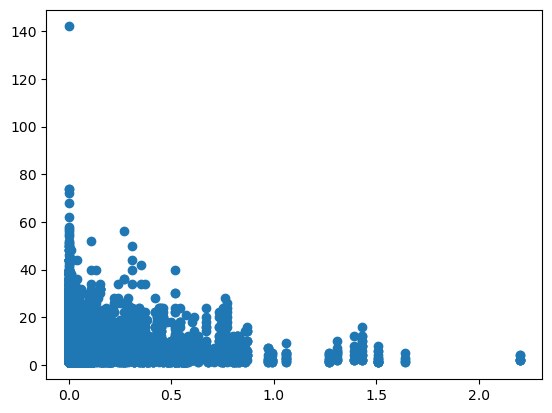

In [111]:
plt.scatter(x=X_test['precipitation_in'], y=y_pred)

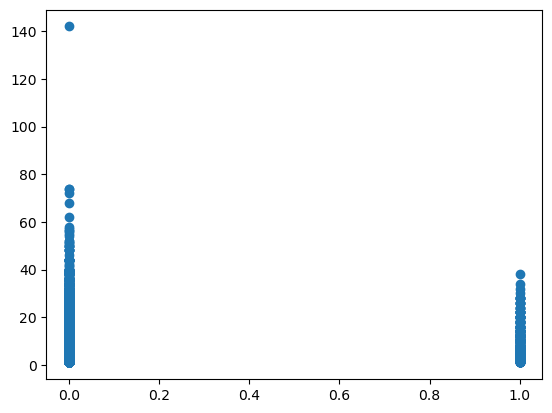

In [112]:
plt.scatter(x=X_test['event_1_Fog'], y=y_pred)

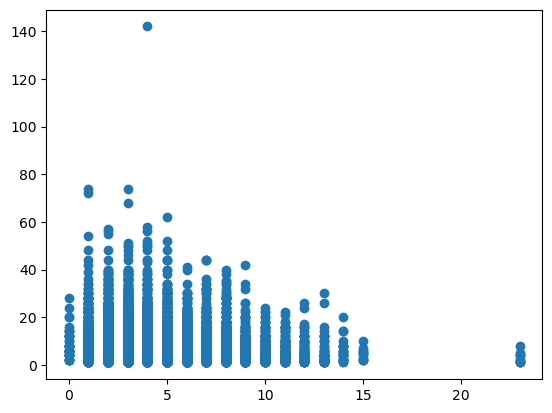

In [118]:
plt.scatter(x=X_test['mean_wind_speed_mph'], y=y_pred)

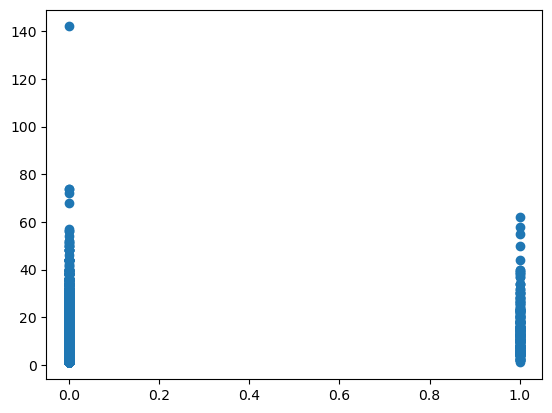

In [114]:
plt.scatter(x=X_test['name_3rd Ave & Broad St'], y=y_pred)

In [121]:
plt.scatter(x=X_test['event_1_Fog'] y=y_pred)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (4291163679.py, line 1)

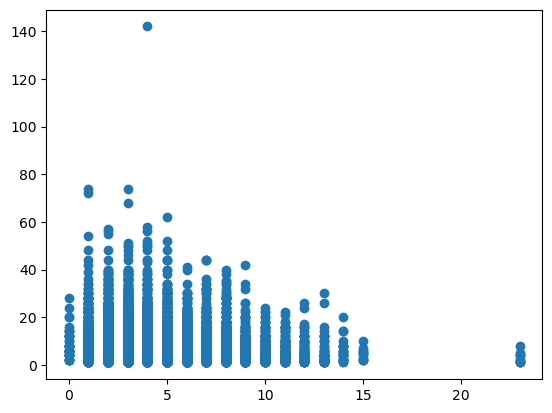

In [122]:
plt.scatter(x=X_test['mean_wind_speed_mph'], y=y_pred)